In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('pool_video.mp4')
ret, frame = cap.read()

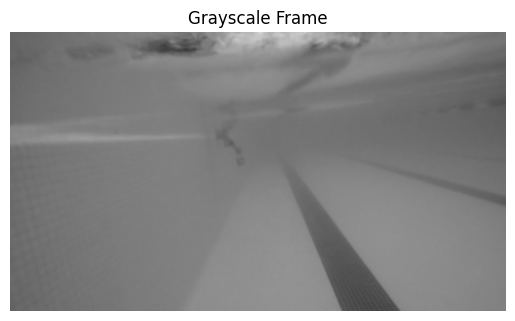

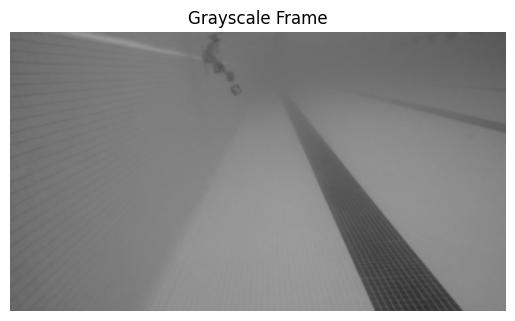

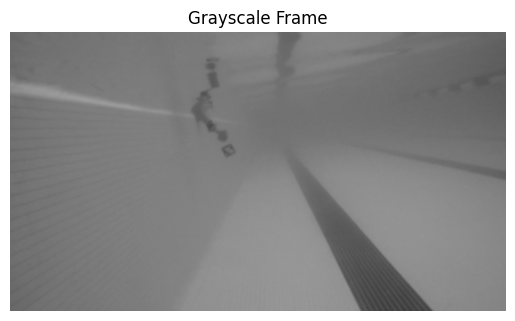

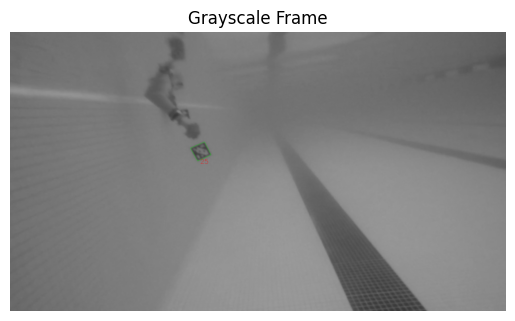

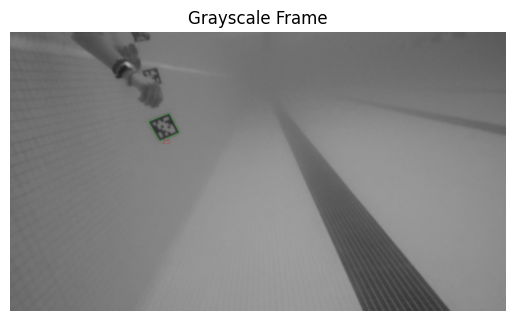

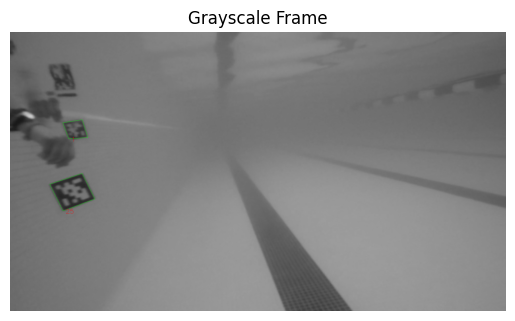

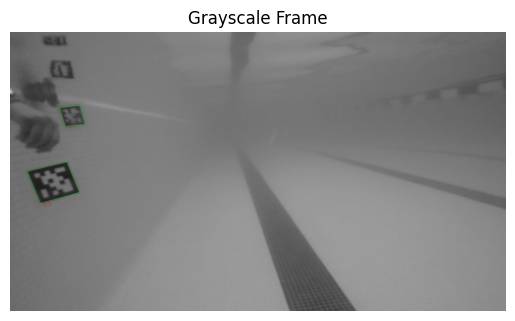

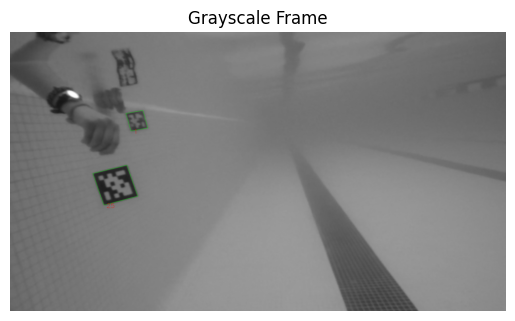

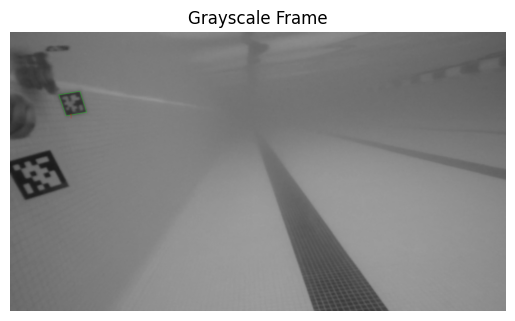

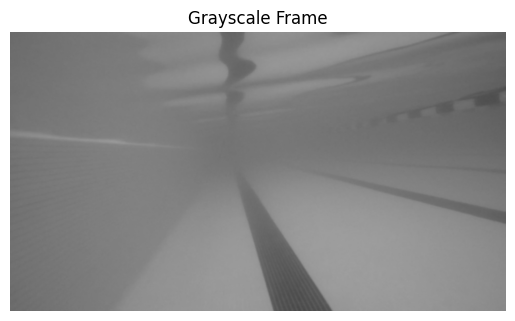

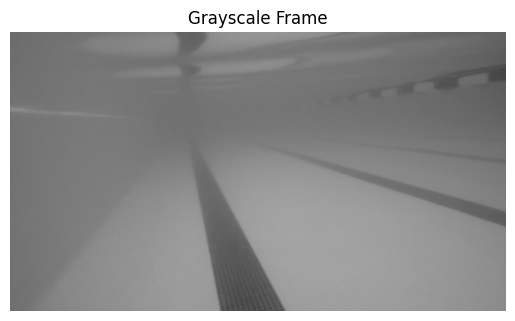

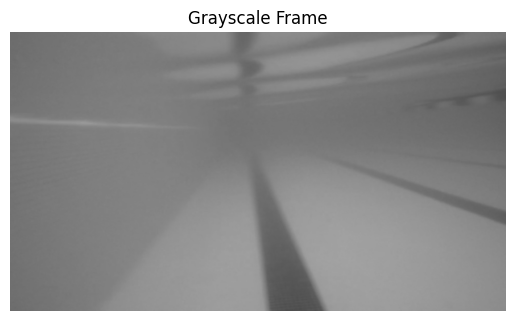

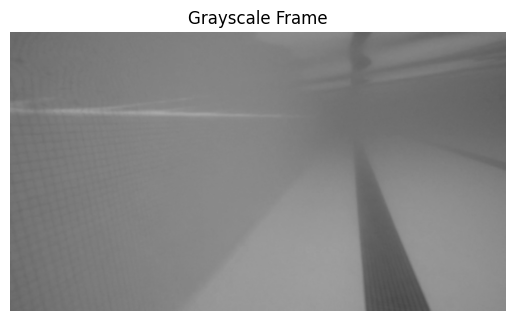

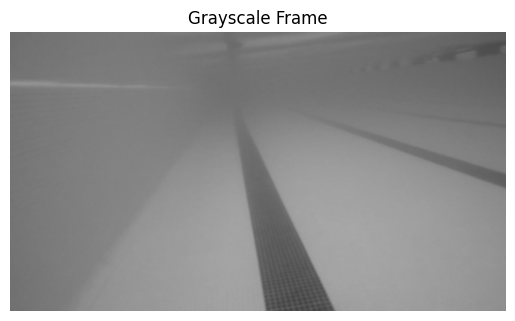

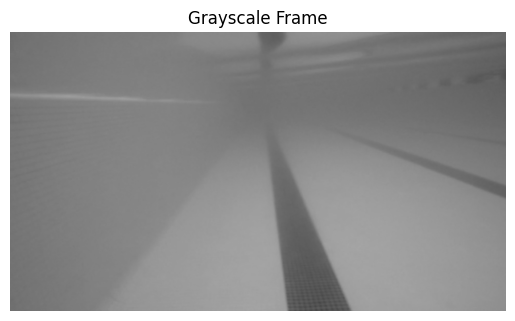

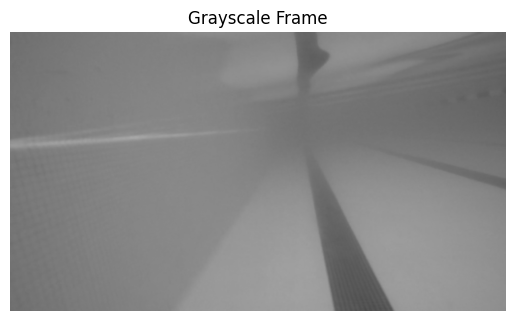

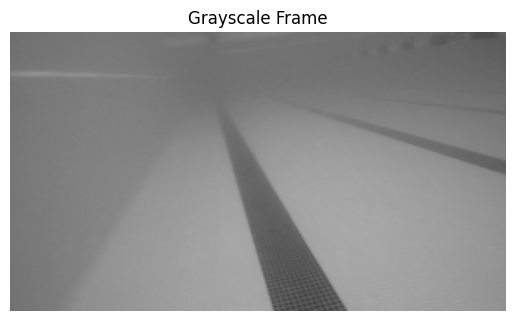

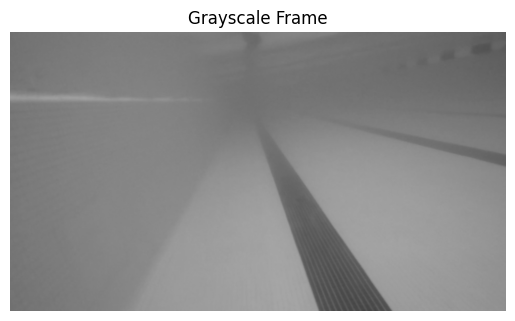

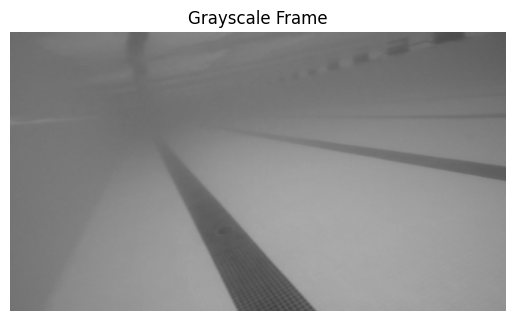

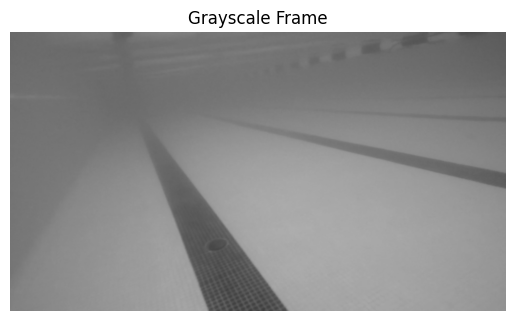

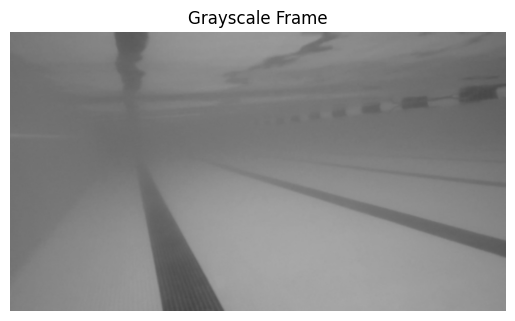

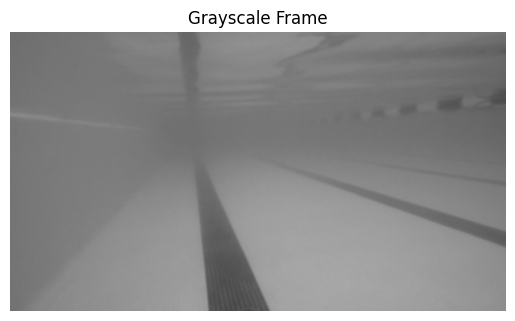

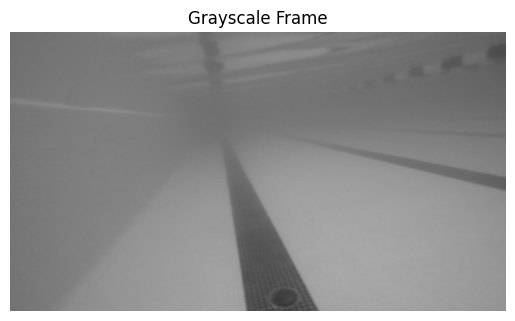

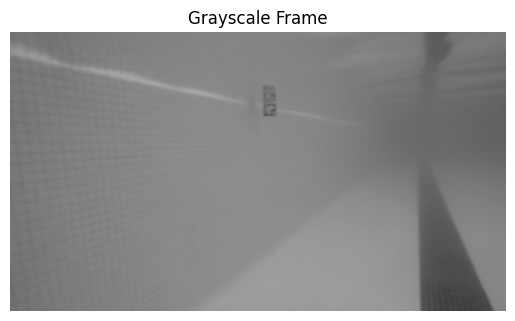

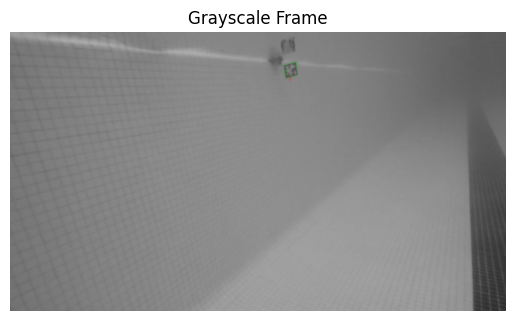

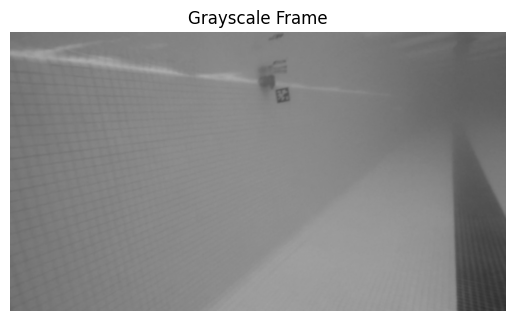

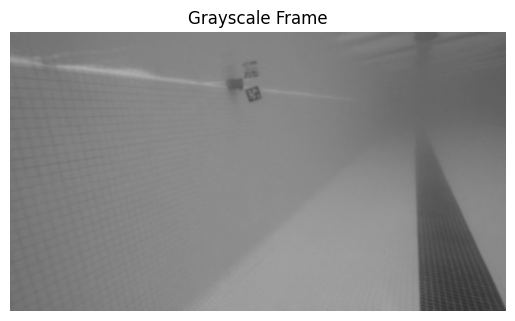

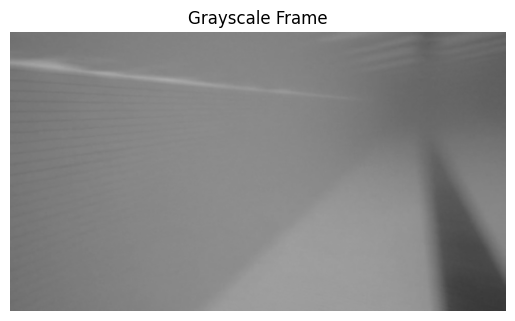

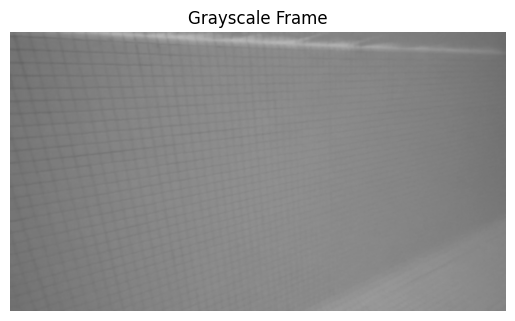

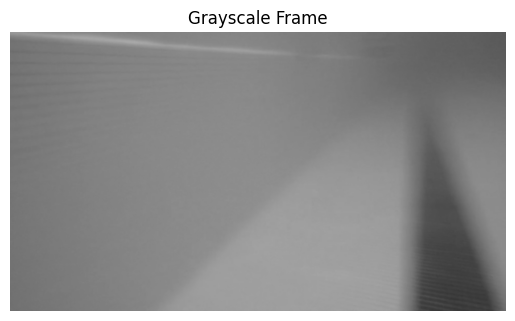

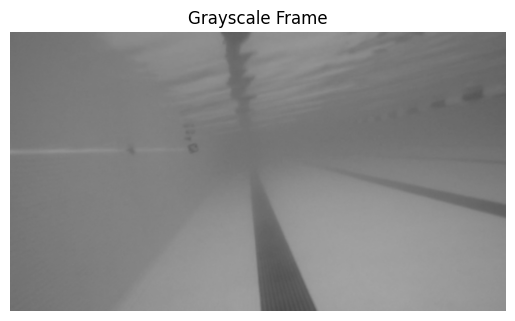

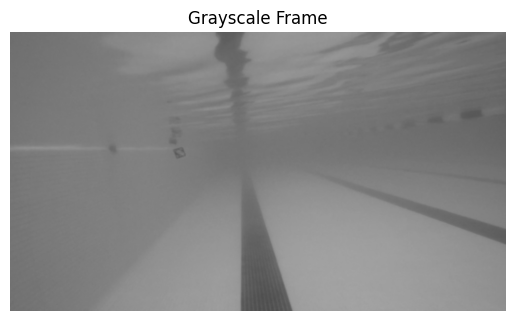

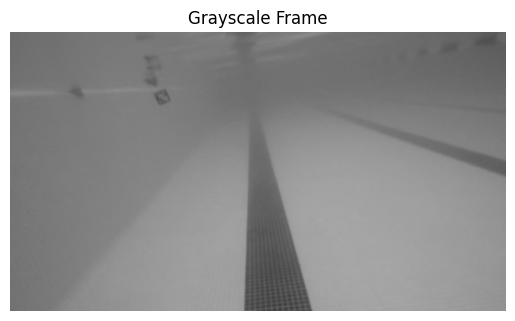

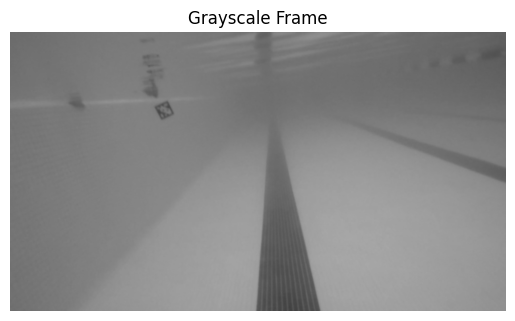

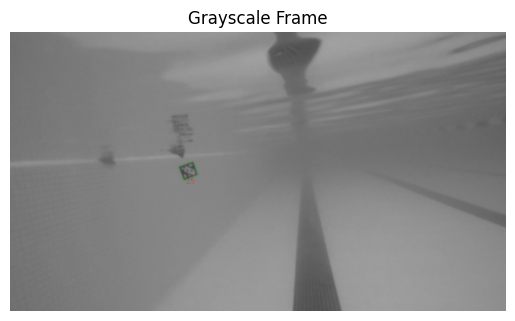

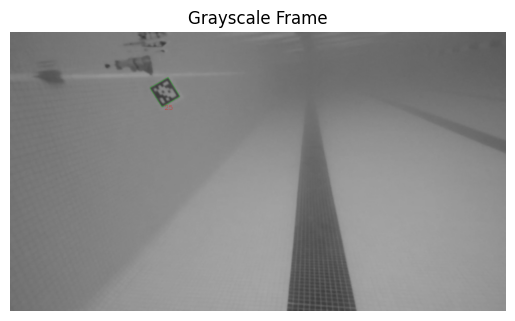

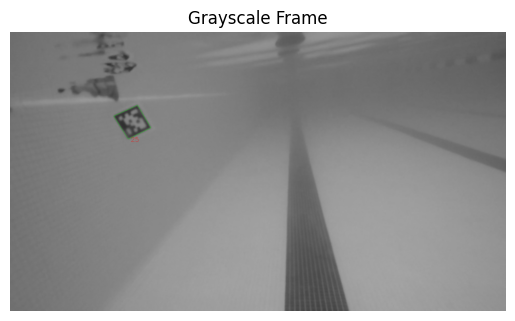

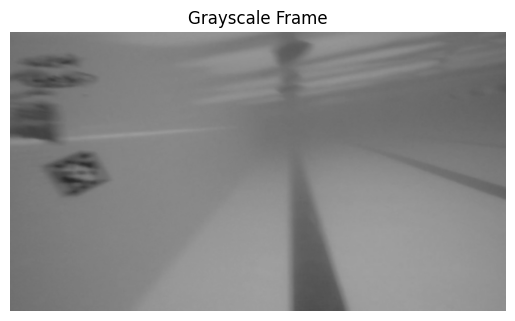

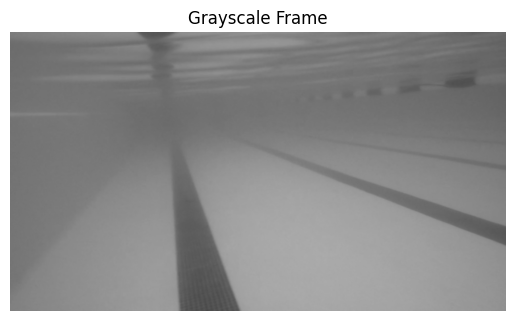

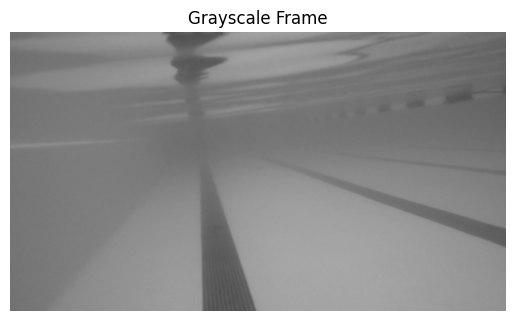

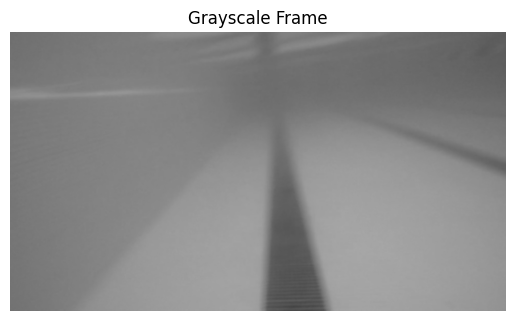

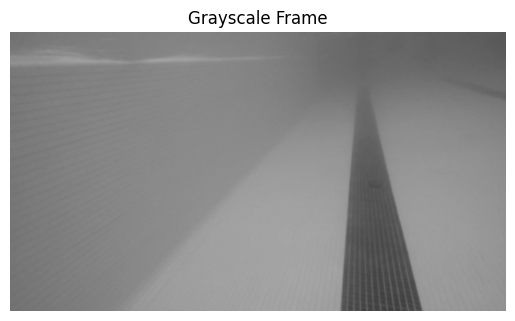

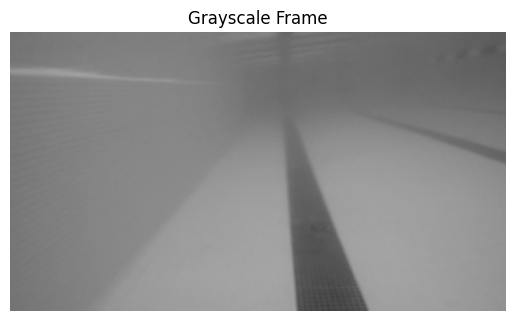

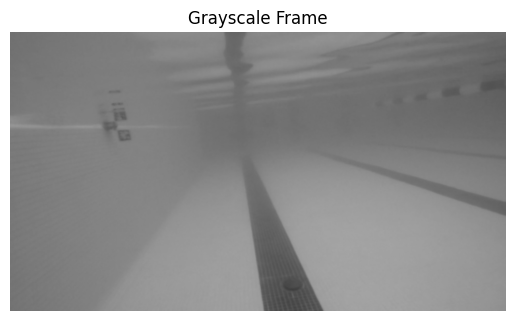

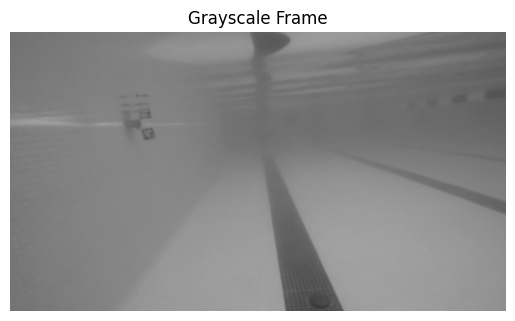

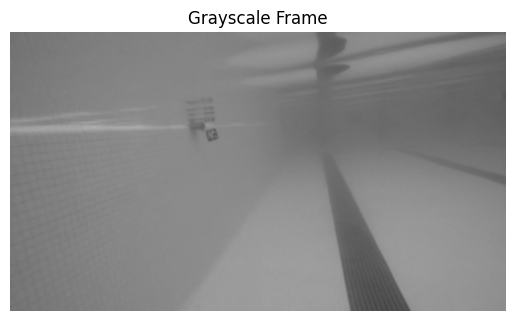

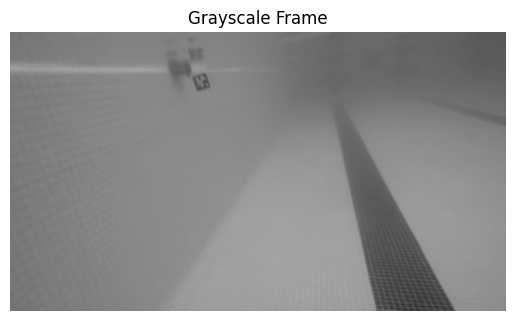

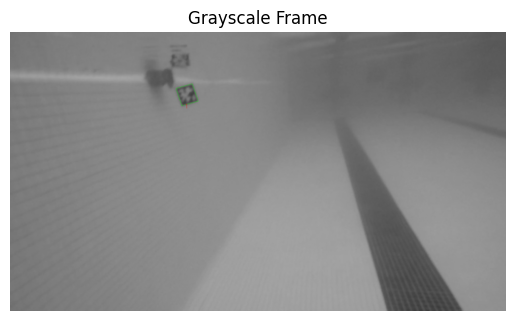

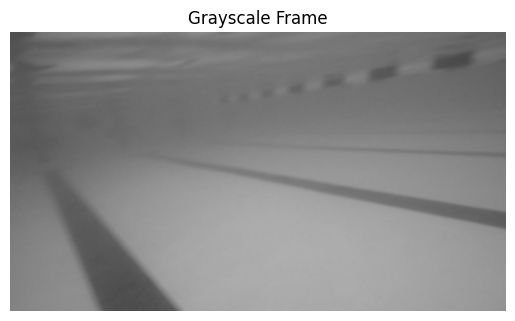

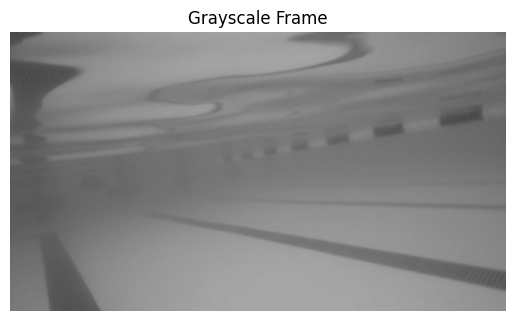

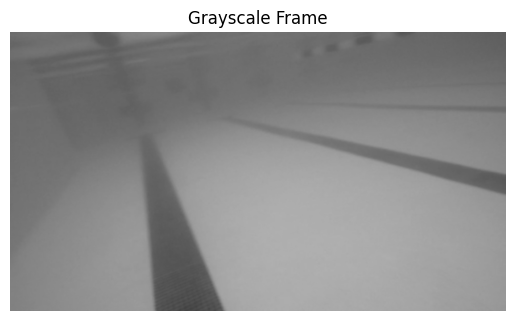

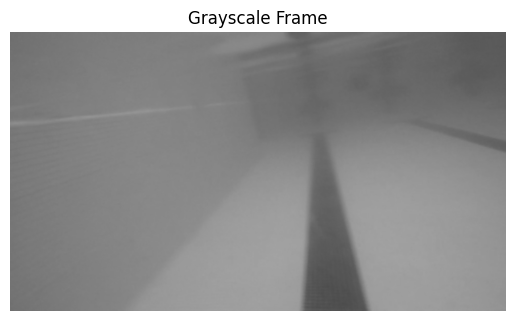

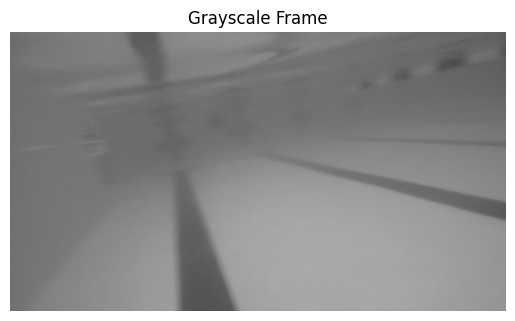

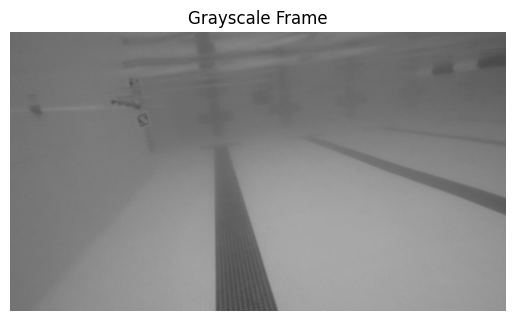

KeyboardInterrupt: 

In [2]:
import cv2
import matplotlib.pyplot as plt
from dt_apriltags import Detector

def process_frame(frame):
    """
    Applies Gaussian blur and converts the frame to grayscale.

    Args:
        frame (numpy.ndarray): The input frame in BGR format.

    Returns:
        tuple: A tuple containing the Gaussian blurred frame and the grayscale frame.
    """
    gblur = cv2.GaussianBlur(frame, (5, 5), 0)
    gray = cv2.cvtColor(gblur, cv2.COLOR_BGR2GRAY)
    return gblur, gray

def display_frame(frame, title='Frame'):
    """
    Displays the given frame using matplotlib.

    Args:
        frame (numpy.ndarray): The frame to be displayed.
        title (str): The title of the frame window.
    """
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.pause(0.001)  # Pause to allow the image to be displayed

def detect_april_tags(frame):
    """
    Detects AprilTags in the given frame and draws lines and IDs on the detected tags.

    Arg:
        frame (numpy.ndarray): The input frame in grayscale format.

    Returns:
        numpy.ndarray: The frame with detected AprilTags drawn.
    """
    # Initialize the AprilTag detector
    at_detector = Detector(families='tag36h11',
                           nthreads=1,
                           quad_decimate=1.0,
                           quad_sigma=0.0,
                           refine_edges=1,
                           decode_sharpening=0.25,
                           debug=0)

    tags = at_detector.detect(frame, estimate_tag_pose=False, camera_params=None, tag_size=None)
    color_frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)

    for tag in tags:
        for idx in range(len(tag.corners)):
            cv2.line(color_frame, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

        cv2.putText(color_frame, str(tag.tag_id),
                    org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.8,
                    color=(0, 0, 255))
    
    return color_frame



def process_video_iterative(video_path):
    """
    Processes a video, displaying and detecting AprilTags every 1000 frames.
    """
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while cap.isOpened():
        isTrue, frame = cap.read()
        if not isTrue:
            break
        
        frame_count += 1
        
        if frame_count % 400 == 0:
            gblur, gray = process_frame(frame)
            at_detection = detect_april_tags(gray)
            display_frame(at_detection)
           
    cap.release()
    plt.close()

# Run the function to process the video
process_video_iterative('pool_video.mp4')